# Business Understanding

Objectives:
1. Menemukan kelompok nasabah utnuk menentukan RESIKO serangan jantung koroner

## Segmentasi Nasabah Asuransi kesehatan untuk menemukan tingkat RESIKO jantung koroner dengan pendekatan sains data

Permasalahan: Unsupervised Leaning Algoritma K-MEans Clusterrin Evaluasi: ElBOW Method

# Data Understanding

In [ ]:
# Memanggil Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mengubungkan Data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/DataSource/Chapter06DataSet.csv'

load_data_res = pd.read_csv(path)

# Membentuk data dalam data frame

df = pd.DataFrame(load_data_res)

df.head()

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1


In [ ]:
df.isnull().sum()

Weight         0
Cholesterol    0
Gender         0
dtype: int64

In [ ]:
df.isna().sum()

Weight         0
Cholesterol    0
Gender         0
dtype: int64

## Data Preparation

1. Tidak ada JOIN antar table, alias semua field sudah dicover dalam satu tabel
2. Tidak ada melakukan handling missing value, disebabkan tidak ada data NULL value dan juga NaN value.

# Pemodelan data Menggunakan Clusterring

In [ ]:
from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Menentukan Input Variabel

x = df[['Weight','Cholesterol','Gender']]

# Pada pemodelan Unsuprevised learning tidak ada variabel target

## Elbow Metodologi

Adalah suatu metode untuk menentukan nilai N cluster, sehingga cluster tersebut optimal

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

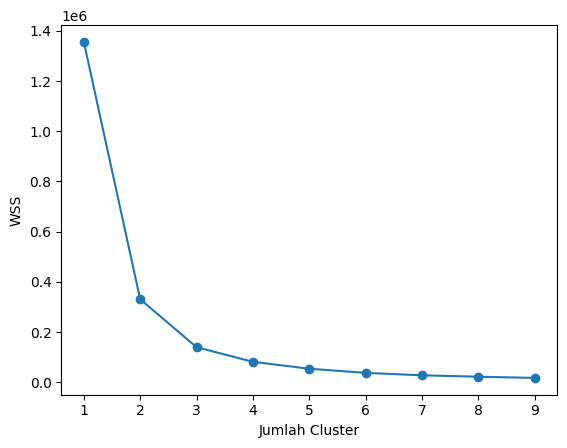

In [ ]:
cluster_range = range(1,10)

cluster_wss= []

for num_cluster in cluster_range:
  clusters = KMeans(num_cluster)
  clusters.fit(x)
  cluster_wss.append(clusters.inertia_)

plt.xlabel('Jumlah Cluster')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker='o')

plt.show()


## Hasil Analisis ELBOW

Ditemukan garis lengkung ELBOW berasda pada titik 2 kemudian melandai diangka 3 dan landai kembali di angka 4.

Bisa disimpulkan bahaw nilai n cluster akan optimal pada nilai cluster 3 sd 4.

In [ ]:
# Menentukan konfigurasi K means pada model

cls = KMeans(n_clusters=3, random_state=0)

# Membentuk Model
model_cls = cls.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['cluster'] = model_cls.labels_

In [ ]:
df.head(5)

,Weight,Cholesterol,Gender,cluster
0,102,111,1,1
1,115,135,1,1
2,115,136,1,1
3,140,167,0,0
4,130,158,1,0


In [ ]:
# Eksport to Excel
# Exsport as download if in colab
from google.colab import files

# Menyimpan file/eksport file to local computer output CSV file

df.to_excel('df_cluster.xlsx')
files.download('df_cluster.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Case 2 (Mortality Rate Cluster)

## Business Understanding
Objectives: Menemukan Cluster dari data, untuk melihat potensial risk angka rate mortality. Hal ini diperlukan untuk menentukan langkah.

Pemodelan: Clustering - Unsupervised Learning


## Data Understanding

In [ ]:
# Load Data nasabah baru/calon nasabah yg mengajukan kredit

path1 = '/content/drive/MyDrive/DataSource/data_mortality_rate.xlsx'
load_data_mr = pd.read_excel(path1)

# DataFrame

df_1 = pd.DataFrame(load_data_mr)
df_1.head()

,Year of Date,Month of Date,Day of Date,Count of Sheet1,Crude Birth Ratio,Crude Death Ratio,HIV Prevalence,Immunization Measless,Infant Mortality Rate,Life expentancy rate,Malaria Prevalence,Maternal Mortality Rate,Nurse Density,Pharmaceutical,Physi density,TB Prevalence,Undernourish Population,Underweight Children,immunization DPT
0,1990,December,31,10,295.2,76.5,1.82,698.0,471.4,674.8,0.0,3281.0,849.62,0.0,849.62,0.0,273.8,280.6,740.0
1,1991,December,31,10,289.1,75.5,2.69,696.0,458.2,678.1,0.0,3093.0,767.07,76.0,767.07,0.0,273.8,243.2,734.0
2,1992,December,31,10,282.9,74.6,3.23,720.0,445.7,681.2,0.0,2908.0,519.69,24.0,519.69,0.0,268.1,214.1,722.0
3,1993,December,31,10,276.3,73.9,3.75,739.0,433.5,683.1,0.0,2787.0,828.39,81.0,828.39,0.0,264.0,225.6,737.0
4,1994,December,31,10,268.6,71.5,4.09,812.0,422.0,687.9,0.0,2631.0,555.81,0.0,555.81,0.0,239.1,183.4,779.0


## Pemodelan Cluster



In [ ]:
from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Menentukan Input Variabel

x1 = df_1[['Crude Birth Ratio',	'Crude Death Ratio', 'HIV Prevalence',	'Immunization Measless',	'Infant Mortality Rate',	'Life expentancy rate',	'Malaria Prevalence',	'Maternal Mortality Rate',	'Nurse Density', 'Pharmaceutical',	'Physi density',	'TB Prevalence',	'Undernourish Population',	'Underweight Children',	'immunization DPT']]

# Pada pemodelan Unsuprevised learning tidak ada variabel target

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

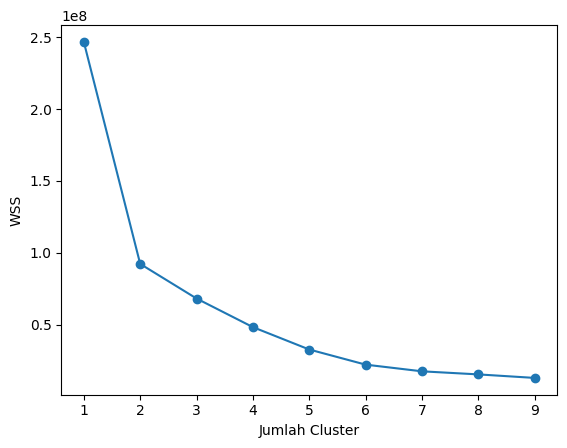

In [ ]:
# Elbow Metodologi

cluster_range = range(1,10)

cluster_wss= []

for num_cluster in cluster_range:
  clusters = KMeans(num_cluster)
  clusters.fit(x1)
  cluster_wss.append(clusters.inertia_)

plt.xlabel('Jumlah Cluster')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker='o')

plt.show()


In [ ]:
# Menentukan konfigurasi K means pada model

cls = KMeans(n_clusters=5, random_state=0)

# Membentuk Model
model_cls = cls.fit(x1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_1['cluster'] = model_cls.labels_

In [ ]:
# Eksport to Excel
# Exsport as download if in colab
from google.colab import files

# Menyimpan file/eksport file to local computer output CSV file

df_1.to_excel('df_cluster_mortality.xlsx')
files.download('df_cluster_mortality.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>